Tablero inicial:


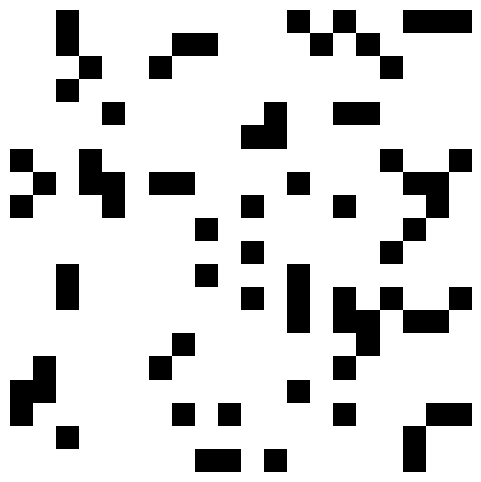

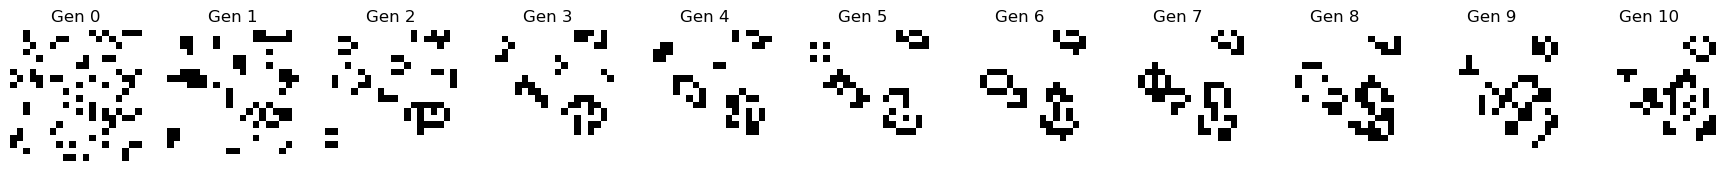

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Inicialización del tablero
def initialize_board(rows, cols, random_seed=None):
    """
    Inicializa el tablero del Juego de la Vida.
    
    Args:
        rows (int): Número de filas del tablero.
        cols (int): Número de columnas del tablero.
        random_seed (int, opcional): Semilla para reproducir resultados aleatorios.
    
    Returns:
        numpy.ndarray: Tablero inicial con valores 0 (muerto) o 1 (vivo).
    """
    if random_seed is not None:
        np.random.seed(random_seed)  # Asegurar reproducibilidad
    return np.random.choice([0, 1], size=(rows, cols), p=[0.8, 0.2])

# 2. Reglas del Juego de la Vida
def update_board(board):
    """
    Actualiza el tablero aplicando las reglas del Juego de la Vida.
    
    Args:
        board (numpy.ndarray): El tablero actual.
    
    Returns:
        numpy.ndarray: El tablero actualizado.
    """
    # Crear una copia del tablero para calcular las nuevas generaciones
    new_board = board.copy()
    rows, cols = board.shape

    for row in range(rows):
        for col in range(cols):
            # Contar vecinos vivos
            neighbors = (
                board[max(0, row-1):min(row+2, rows), max(0, col-1):min(col+2, cols)].sum()
                - board[row, col]  # Excluir la célula actual
            )
            
            # Aplicar reglas del Juego de la Vida
            if board[row, col] == 1:  # Si la célula está viva
                if neighbors < 2 or neighbors > 3:  # Muere por soledad o sobrepoblación
                    new_board[row, col] = 0
            elif board[row, col] == 0:  # Si la célula está muerta
                if neighbors == 3:  # Nace por reproducción
                    new_board[row, col] = 1

    return new_board

# 3. Visualización
def plot_board(board):
    """
    Dibuja el tablero usando matplotlib.
    
    Args:
        board (numpy.ndarray): Tablero a visualizar.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.show()

# 4. Simulación
def run_simulation(initial_board, steps):
    """
    Ejecuta la simulación del Juego de la Vida y almacena cada paso.
    
    Args:
        initial_board (numpy.ndarray): Tablero inicial.
        steps (int): Número de ciclos a simular.
    
    Returns:
        list: Lista de tableros en cada paso de la simulación.
    """
    board = initial_board
    boards = [board]
    for step in range(steps):
        board = update_board(board)
        boards.append(board)
    return boards

# 5. Visualización de la simulación
def plot_simulation(boards):
    """
    Dibuja los tableros de la simulación en una cuadrícula.
    
    Args:
        boards (list): Lista de tableros en cada paso de la simulación.
    """
    steps = len(boards)
    fig, axes = plt.subplots(1, steps, figsize=(steps * 2, 2))
    for i, board in enumerate(boards):
        ax = axes[i]
        ax.imshow(board, cmap='binary', interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'Gen {i}')
    plt.show()

# Ejemplo de uso
# Configuración inicial
rows, cols = 20, 20  # Tamaño del tablero
initial_board = initialize_board(rows, cols)  # Remove random_seed to get different boards

# Mostrar el tablero inicial
print("Tablero inicial:")
plot_board(initial_board)

# Ejecutar la simulación
steps = 10
boards = run_simulation(initial_board, steps)

# Mostrar la simulación
plot_simulation(boards)


# Pedi una ventana con la animacion cuztomizable

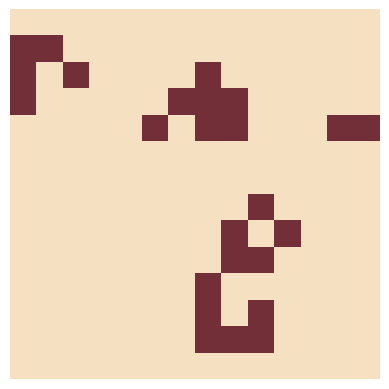

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to initialize the board
def initialize_board(rows=14, cols=14, random_seed=None):
    """
    Initializes the board for the Game of Life.

    Args:
        rows (int): Number of rows in the board.
        cols (int): Number of columns in the board.
        random_seed (int, optional): Seed for random number generator.

    Returns:
        numpy.ndarray: Initial board with 0 (dead) and 1 (alive) cells.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    return np.random.choice([0, 1], size=(rows, cols), p=[0.8, 0.2])

# Function to update the board
def update_board(board):
    """
    Updates the board according to the Game of Life rules.

    Args:
        board (numpy.ndarray): Current board state.

    Returns:
        numpy.ndarray: Updated board state.
    """
    new_board = board.copy()
    rows, cols = board.shape

    for row in range(rows):
        for col in range(cols):
            neighbors = (
                board[max(0, row-1):min(row+2, rows), max(0, col-1):min(col+2, cols)].sum()
                - board[row, col]
            )
            if board[row, col] == 1:  # Alive cell
                if neighbors < 2 or neighbors > 3:
                    new_board[row, col] = 0
            elif board[row, col] == 0:  # Dead cell
                if neighbors == 3:
                    new_board[row, col] = 1

    return new_board

# Function to launch the simulation
def launch_simulation(
    rows=14,
    cols=14,
    frames_per_second=1,
    steps=500,
    alive_color="#722F37",  # Wine
    dead_color="#F5E0C2"  # Cream
):
    """
    Launches an animated simulation of the Game of Life.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        frames_per_second (int): Animation speed in frames per second.
        steps (int): Number of steps to simulate.
        alive_color (str): Color for alive cells.
        dead_color (str): Color for dead cells.
    """
    board = initialize_board(rows, cols)

    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('key_press_event', lambda event: plt.close(fig) if event.key == 'q' else None)
    fig.canvas.mpl_connect('button_press_event', lambda event: plt.close(fig))

    # Create a colormap for the grid
    cmap = plt.matplotlib.colors.ListedColormap([dead_color, alive_color])
    
    img = ax.imshow(board, cmap=cmap, interpolation="nearest")
    ax.axis('off')

    def update(frame):
        nonlocal board
        board = update_board(board)
        img.set_array(board)
        return [img]

    anim = FuncAnimation(
        fig,
        update,
        frames=steps,
        interval=1000 // frames_per_second,
        blit=True
    )

    plt.show(block=True)
    plt.pause(3)  # Keeps the window open for 3 minutes after the animation

# Example usage
if __name__ == "__main__":
    launch_simulation()


Bueno esto de ariba supuestamente ejecutaba una animacion que nunca vi.

# Ahora le pedi hacer una clase para guardar partidas

In [9]:
import numpy as np
import pygame
import time

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        """
        Initializes the Game of Life simulation.

        Args:
            rows (int): Number of rows in the grid.
            cols (int): Number of columns in the grid.
            alive_color (tuple): RGB color for alive cells.
            dead_color (tuple): RGB color for dead cells.
        """
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:  # Alive cell
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:  # Dead cell
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def run_simulation(self, frames_per_second=1, steps=500):
        pygame.init()
        cell_size = 20
        screen = pygame.display.set_mode((self.cols * cell_size, self.rows * cell_size))
        pygame.display.set_caption("Game of Life")
        clock = pygame.time.Clock()

        running = True
        self.start_time = time.time()
        for _ in range(steps):
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                    break

            if not running:
                break

            screen.fill(self.dead_color)
            for row in range(self.rows):
                for col in range(self.cols):
                    color = self.alive_color if self.board[row, col] == 1 else self.dead_color
                    pygame.draw.rect(
                        screen,
                        color,
                        (col * cell_size, row * cell_size, cell_size - 1, cell_size - 1)
                    )

            pygame.display.flip()
            self.update_board()
            clock.tick(frames_per_second)

        execution_time = time.time() - self.start_time
        print(f"Simulation completed in {execution_time:.2f} seconds and {self.steps} steps.")
        pygame.quit()

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=14, cols=14)
    game.run_simulation(frames_per_second=2, steps=100)


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.6.1 (SDL 2.30.10, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
Simulation completed in 50.06 seconds and 100 steps.


# ahora q guarde un GIF

In [10]:
import numpy as np
import pygame
import time
from PIL import Image, ImageDraw, ImageSequence
import os

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        """
        Initializes the Game of Life simulation.

        Args:
            rows (int): Number of rows in the grid.
            cols (int): Number of columns in the grid.
            alive_color (tuple): RGB color for alive cells.
            dead_color (tuple): RGB color for dead cells.
        """
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:  # Alive cell
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:  # Dead cell
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def run_simulation(self, frames_per_second=1, steps=500):
        pygame.init()
        cell_size = 20
        screen = pygame.display.set_mode((self.cols * cell_size, self.rows * cell_size))
        pygame.display.set_caption("Game of Life")
        clock = pygame.time.Clock()

        running = True
        self.start_time = time.time()
        for _ in range(steps):
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                    break

            if not running:
                break

            screen.fill(self.dead_color)
            for row in range(self.rows):
                for col in range(self.cols):
                    color = self.alive_color if self.board[row, col] == 1 else self.dead_color
                    pygame.draw.rect(
                        screen,
                        color,
                        (col * cell_size, row * cell_size, cell_size - 1, cell_size - 1)
                    )

            pygame.display.flip()
            self.update_board()
            clock.tick(frames_per_second)

        execution_time = time.time() - self.start_time
        print(f"Simulation completed in {execution_time:.2f} seconds and {self.steps} steps.")
        pygame.quit()

    def save_to_gif(self, filename="game_of_life.gif", frames_per_second=1, steps=100):
        """
        Saves the simulation as a GIF file.

        Args:
            filename (str): Name of the output GIF file.
            frames_per_second (int): Frame rate for the GIF.
            steps (int): Number of steps to include in the GIF.
        """
        cell_size = 10
        images = []

        for _ in range(steps):
            # Create an image for the current board state
            img = Image.new("RGB", (self.cols * cell_size, self.rows * cell_size), self.dead_color)
            draw = ImageDraw.Draw(img)

            for row in range(self.rows):
                for col in range(self.cols):
                    if self.board[row, col] == 1:
                        x0, y0 = col * cell_size, row * cell_size
                        x1, y1 = x0 + cell_size, y0 + cell_size
                        draw.rectangle([x0, y0, x1, y1], fill=self.alive_color)

            images.append(img)
            self.update_board()

        # Save images as a GIF
        images[0].save(
            filename,
            save_all=True,
            append_images=images[1:],
            duration=1000 // frames_per_second,
            loop=0
        )
        print(f"GIF saved as {filename}")

        # Open the GIF in the default image viewer
        os.system(f"xdg-open {filename}" if os.name == "posix" else f"start {filename}")

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=14, cols=14)
    game.save_to_gif(frames_per_second=2, steps=50)


GIF saved as game_of_life.gif


In [13]:
import random
from PIL import Image, ImageDraw
import os

def generate_random_color():
    """
    Generates a random bright or dark color.
    
    Returns:
        tuple: RGB color.
    """
    return tuple(random.randint(0, 255) for _ in range(3))

def save_gif_with_random_colors(boards, filename="game_of_life_random_colors.gif", steps=10):
    """
    Saves the simulation as a GIF file with random bright and dark color pairs.

    Args:
        boards (list): List of board states.
        filename (str): Name of the output GIF file.
        steps (int): Number of steps to include in the GIF.
    """
    cell_size = 10
    images = []

    bright_color = generate_random_color()
    dark_color = generate_random_color()

    for board in boards[:steps]:
        img = Image.new("RGB", (cols * cell_size, rows * cell_size), dark_color)
        draw = ImageDraw.Draw(img)

        for row in range(rows):
            for col in range(cols):
                if board[row, col] == 1:
                    x0, y0 = col * cell_size, row * cell_size
                    x1, y1 = x0 + cell_size, y0 + cell_size
                    draw.rectangle([x0, y0, x1, y1], fill=bright_color)

        images.append(img)

    # Save images as a GIF
    download_path = os.path.join(os.path.expanduser("~"), "Downloads", filename)
    images[0].save(
        download_path,
        save_all=True,
        append_images=images[1:],
        duration=1000 // 3,  # Three times faster pace
        loop=0
    )
    print(f"GIF saved as {download_path}")

    # Open the GIF in the default image viewer
    os.system(f"xdg-open {download_path}" if os.name == "posix" else f"start {download_path}")

# Example usage
save_gif_with_random_colors(boards, steps=steps)



GIF saved as C:\Users\User\Downloads\game_of_life_random_colors.gif


# class integration

In [15]:
import numpy as np
import pygame
import time
from PIL import Image, ImageDraw
import os
import random

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def generate_random_colors(self):
        """
        Generates a pair of random bright and dark colors.
        Returns:
            tuple: (alive_color, dead_color)
        """
        bright_color = tuple(random.randint(128, 255) for _ in range(3))  # Bright colors
        dark_color = tuple(random.randint(0, 127) for _ in range(3))  # Dark colors
        return bright_color, dark_color

    def save_to_gif(self, filename="game_of_life.gif", frames_per_second=1, steps=100, random_colors=False):
        """
        Saves the simulation as a GIF file.
        Args:
            filename (str): Name of the output GIF file.
            frames_per_second (int): Frame rate for the GIF.
            steps (int): Number of steps to include in the GIF.
            random_colors (bool): If True, use random colors for the GIF.
        """
        cell_size = 10
        images = []

        if random_colors:
            self.alive_color, self.dead_color = self.generate_random_colors()

        for _ in range(steps):
            img = Image.new("RGB", (self.cols * cell_size, self.rows * cell_size), self.dead_color)
            draw = ImageDraw.Draw(img)
            for row in range(self.rows):
                for col in range(self.cols):
                    if self.board[row, col] == 1:
                        x0, y0 = col * cell_size, row * cell_size
                        x1, y1 = x0 + cell_size, y0 + cell_size
                        draw.rectangle([x0, y0, x1, y1], fill=self.alive_color)
            images.append(img)
            self.update_board()

        images[0].save(
            filename,
            save_all=True,
            append_images=images[1:],
            duration=1000 // frames_per_second,
            loop=0
        )
        print(f"GIF saved as {filename}")
        os.system(f"xdg-open {filename}" if os.name == "posix" else f"start {filename}")


In [21]:

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=14, cols=14)
    game.save_to_gif(frames_per_second=2, steps=50, random_colors=True)


GIF saved as game_of_life.gif


# Pido que me genera una estructura para mi proyecto debido a la altisimo modulacion que alcance con rapidez

In [ ]:
import os

def create_project_structure(base_path):
    """
    Crea la estructura de carpetas y archivos para un proyecto de Game of Life.

    Args:
        base_path (str): Ruta base donde se creará la estructura del proyecto.

    Returns:
        None
    """
    # Definimos la estructura de carpetas y archivos
    structure = {
        "data": ["input", "output"],
        "notebooks": [],
        "src": ["__init__.py", "game_of_life.py", "dithering.py", "image_processing.py", "utils.py"],
        "tests": ["test_game_of_life.py", "test_dithering.py"],
        "docs": ["README.md", "algorithms.md"],
    }

    files = ["requirements.txt", "environment.yml", "setup.py", ".gitignore"]

    # Crear carpetas y archivos
    for folder, subitems in structure.items():
        folder_path = os.path.join(base_path, folder)
        os.makedirs(folder_path, exist_ok=True)

        for subitem in subitems:
            subitem_path = os.path.join(folder_path, subitem)
            if "." in subitem:  # Es un archivo
                with open(subitem_path, "w") as f:
                    pass

    # Crear archivos raíz
    for file in files:
        file_path = os.path.join(base_path, file)
        with open(file_path, "w") as f:
            pass

    print(f"Estructura de proyecto creada en: {base_path}")

# Ejemplo de uso
# create_project_structure(r"C:\Users\User\Desktop\Final_Streamlit_Portfolio_Projects\Side_quest_gameoflife")


Estructura de proyecto creada en: C:\Users\User\Desktop\Final_Streamlit_Portfolio_Projects\Side_quest_gameoflife
